In [99]:
# Problem 1A:

In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from statsmodels.formula.api import ols

from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,MultiComparison) # Tukey HSD Test
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the dataset CSV file

In [101]:
df_salary = pd.read_csv('SalaryData.csv')

## Checking the top 5 records

In [102]:
df_salary.head()

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769


## Checking the shape and information of the dataframe

In [103]:
df_salary.shape

(40, 3)

In [104]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


## Checking the summary of the dataframe

In [105]:
df_salary.describe(include='all')

,Education,Occupation,Salary
count,40,40,40.000000
unique,3,4,NaN
top,Doctorate,Prof-specialty,NaN
freq,16,13,NaN
mean,NaN,NaN,162186.875000
std,NaN,NaN,64860.407506
min,NaN,NaN,50103.000000
25%,NaN,NaN,99897.500000
50%,NaN,NaN,169100.000000
75%,NaN,NaN,214440.750000


In [106]:
df_salary.Occupation = pd.Categorical(df_salary.Occupation)

In [107]:
df_salary.Education = pd.Categorical(df_salary.Education)

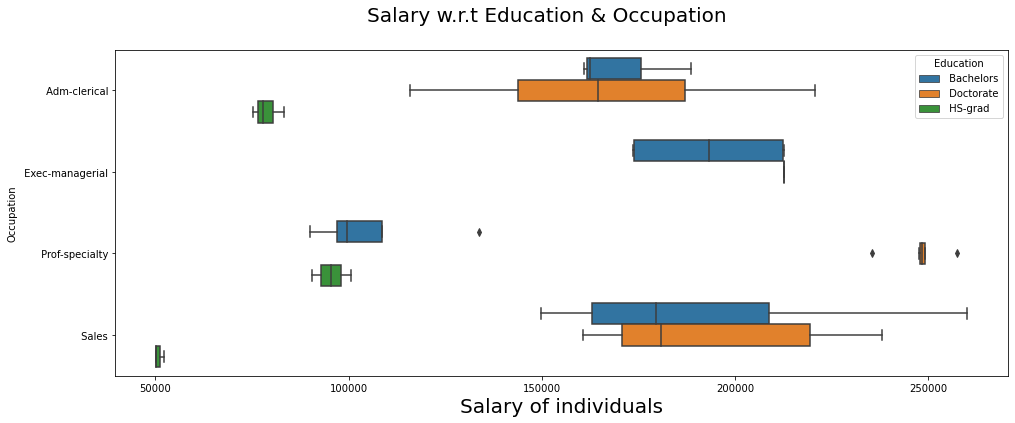

In [108]:
fig = plt.figure(figsize=(16,6))
fig.suptitle('Salary w.r.t Education & Occupation', fontsize=20, ha='center')
sns.boxplot(x = 'Salary' , y= 'Occupation' , data = df_salary ,hue = 'Education');
plt.xlabel('Salary of individuals',fontsize=20)
plt.show();

## Checking distinct values of Education

In [109]:
df_salary.Education.value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

## Checking distinct values of Occupation

In [113]:
df_salary.Occupation.value_counts()

 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64

In [122]:
Doctorate = df_salary[df_salary['Education'] == ' Doctorate']['Salary']
Bachelors = df_salary[df_salary['Education'] == ' Bachelors']['Salary']
HSgrad = df_salary[df_salary['Education'] == ' HS-grad']['Salary']

ProfSpecialty = df_salary[df_salary['Occupation'] == ' Prof-specialty']['Salary']
Sales = df_salary[df_salary['Occupation'] == ' Sales']['Salary']
AdmClerical = df_salary[df_salary['Occupation'] == ' Adm-clerical']['Salary']
ExecManagerial = df_salary[df_salary['Occupation'] == ' Exec-managerial']['Salary']

In [125]:
from scipy import stats
#The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
#alpha = 0.05
print(stats.shapiro([Doctorate]))
print(stats.shapiro([Bachelors]))
print(stats.shapiro([HSgrad]))

print(stats.shapiro([ProfSpecialty]))
print(stats.shapiro([Sales]))
print(stats.shapiro([AdmClerical]))
print(stats.shapiro([ExecManagerial]))

ShapiroResult(statistic=0.8952829837799072, pvalue=0.0675690770149231)
ShapiroResult(statistic=0.9607304334640503, pvalue=0.7050924301147461)
ShapiroResult(statistic=0.885286271572113, pvalue=0.1783432960510254)
ShapiroResult(statistic=0.736305832862854, pvalue=0.0013131146552041173)
ShapiroResult(statistic=0.8897126913070679, pvalue=0.11683900654315948)
ShapiroResult(statistic=0.9189430475234985, pvalue=0.34822404384613037)
ShapiroResult(statistic=0.6901877522468567, pvalue=0.007539781276136637)


In [126]:
#Anderson Darling Test if Shapiro fails
print(stats.anderson(Doctorate,dist='norm'))
print(stats.anderson(Bachelors,dist='norm'))
print(stats.anderson(HSgrad,dist='norm'))


print(stats.anderson(ProfSpecialty,dist='norm'))
print(stats.anderson(Sales,dist='norm'))
print(stats.anderson(AdmClerical,dist='norm'))
print(stats.anderson(ExecManagerial,dist='norm'))
# if statistic < critical_values then data looks normal (fail to reject H0)

AndersonResult(statistic=0.6725735337482739, critical_values=array([0.5  , 0.569, 0.683, 0.797, 0.948]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=0.2793685121409055, critical_values=array([0.498, 0.568, 0.681, 0.794, 0.945]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=0.4369535315712767, critical_values=array([0.507, 0.578, 0.693, 0.808, 0.961]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=1.5424424719265737, critical_values=array([0.497, 0.566, 0.679, 0.792, 0.942]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=0.5755046432785171, critical_values=array([0.497, 0.566, 0.679, 0.792, 0.942]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=0.3783000997297936, critical_values=array([0.501, 0.57 , 0.684, 0.798, 0.95 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statist

In [127]:
#Homogeniety
#The Levene test tests the null hypothesis that all input samples are from populations with equal variances.
#alpha = 0.05
print(stats.levene(Doctorate,Bachelors,HSgrad))
print(stats.levene(ProfSpecialty,Sales,AdmClerical,ExecManagerial))

LeveneResult(statistic=1.8800921605836554, pvalue=0.16686425699301183)
LeveneResult(statistic=2.4378177404396832, pvalue=0.0803790714975064)


# Formulate the Null and Alternate Hypothesis

**Null Hypothesis $H_0$ : The mean salary earned by an individual is same with different categories of Education qualification**

**Alternate Hypothesis $H_A$ : The mean salary earned by an individual is different in at-least one category of Education qualification**

# One Way Anova : Education

In [128]:
formula = 'Salary ~ C(Education)'
model = ols(formula, df_salary).fit()
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


In [129]:
f,p = stats.f_oneway(df_salary[df_salary['Education'] == ' Doctorate'].Salary , df_salary[df_salary['Education'] == ' Bachelors'].Salary , df_salary[df_salary['Education'] == ' HS-grad'].Salary)

In [130]:
print(p)

1.2577090926629002e-08


In [131]:
print(f)

30.95628008792558


**Now, we see that the corresponding p-value is less than alpha (0.05). Thus, we $\textbf{reject}$ the $\textbf{Null Hypothesis}$ ($H_0$).**

**Conclusion: Since the p value is less than the significance level (0.05), we can reject the null hupothesis and conclude that the mean salary earned by an individual is different in at-least one category of Education qualifications**

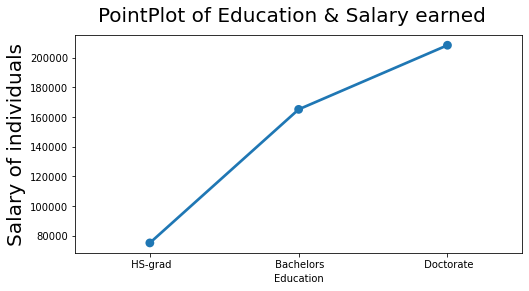

In [132]:
fig = plt.figure(figsize=(8,4))
fig.suptitle('PointPlot of Education & Salary earned', fontsize=20, ha='center')
sns.pointplot(x= 'Education',y = 'Salary',data = df_salary, order=[' HS-grad',' Bachelors',' Doctorate'], ci=None)
plt.ylabel('Salary of individuals',fontsize=20)
plt.show();

### Tukey HSD (Honestly Significant Difference) Test
#### single-step multiple comparison procedure and statistical test

In [133]:
mc = MultiComparison( df_salary['Salary'], df_salary['Education'])
result = mc.tukeyhsd()
print(result)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2     meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------------
 Bachelors  Doctorate   43274.0667 0.0146    7541.1439  79006.9894   True
 Bachelors    HS-grad  -90114.1556  0.001 -132035.1958 -48193.1153   True
 Doctorate    HS-grad -133388.2222  0.001 -174815.0876 -91961.3569   True
-------------------------------------------------------------------------


### Doctorate  - Bachelors = 43274.0667
### HS-grad - Bachelors = -90114.1556
### HS-grad - Doctorate = -133388.2222

### Hence,  Doctorate  > Bachelors  > HS-grad
### The above results reveal that the means of 3 categories of Education qualifications differ from each other

# One Way Anova : Occupation

In [134]:
formula = 'Salary ~ C(Occupation)'
model = ols(formula, df_salary).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


In [135]:
f,p = stats.f_oneway(df_salary[df_salary['Occupation'] == ' Prof-specialty'].Salary , df_salary[df_salary['Occupation'] == ' Sales'].Salary , df_salary[df_salary['Occupation'] == ' Adm-clerical'].Salary , df_salary[df_salary['Occupation'] == ' Exec-managerial'].Salary)

In [136]:
print(p)

0.4585078266495116


In [137]:
print(f)

0.8841441289216039


**Conclusion: Since the p value is more than the significance level (0.05), we can accept the null hypothesis and conclude that the mean salary earned by an individual is same with different categories of Occupation**

<AxesSubplot:xlabel='Occupation', ylabel='Salary'>

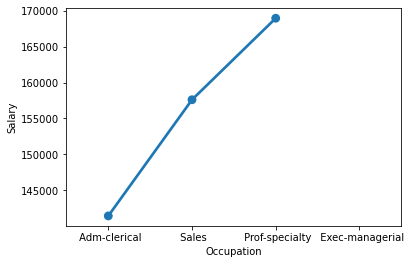

In [138]:
sns.pointplot(x = 'Occupation',y = 'Salary' ,data = df_salary, order=[' Adm-clerical',' Sales',' Prof-specialty','  Exec-managerial'], ci=None)

### Tukey HSD (Honestly Significant Difference) Test
#### single-step multiple comparison procedure and statistical test

In [139]:
mc = MultiComparison( df_salary['Salary'], df_salary['Occupation'])
result = mc.tukeyhsd()
print(result)

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
     group1           group2        meandiff  p-adj     lower        upper    reject
------------------------------------------------------------------------------------
    Adm-clerical  Exec-managerial     55693.3 0.4146  -40415.1459 151801.7459  False
    Adm-clerical   Prof-specialty  27528.8538 0.7252  -46277.4011 101335.1088  False
    Adm-clerical            Sales  16180.1167    0.9  -58951.3115  91311.5449  False
 Exec-managerial   Prof-specialty -28164.4462 0.8263 -120502.4542  64173.5618  False
 Exec-managerial            Sales -39513.1833 0.6507 -132913.8041  53887.4374  False
  Prof-specialty            Sales -11348.7372    0.9  -81592.6398  58895.1655  False
------------------------------------------------------------------------------------


### Exec-managerial - Adm-clerical  = 55693.3
### Prof-specialty - Adm-clerical = 27528.8538
### Sales - Adm-clerical = 16180.1167
### Prof-specialty - Exec-managerial = -28164.4462
### Sales - Exec-managerial = -39513.1833
### Sales - Prof-specialty = -11348.7372

### Hence, Exec-managerial > Prof-specialty > Sales > Adm-clerical
### The above results reveal that the means of 3 categories of Occupations differ from each other

In [140]:
# Problem 1B: 

# Two Way Anova : Education & Occupation

In [141]:
formula = 'Salary ~ C(Education) + C(Occupation)'
model = ols(formula, df_salary).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq          F        PR(>F)
C(Education)    2.0  1.026955e+11  5.134773e+10  31.257677  1.981539e-08
C(Occupation)   3.0  5.519946e+09  1.839982e+09   1.120080  3.545825e-01
Residual       34.0  5.585261e+10  1.642724e+09        NaN           NaN


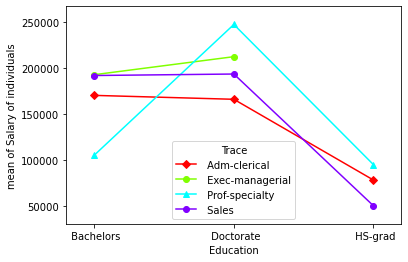

In [144]:
from statsmodels.graphics.factorplots import interaction_plot

interaction_plot(x = np.array(df_salary['Education']),trace = np.array(df_salary['Occupation']),response=df_salary['Salary'], markers = ['D','o','^','o'],xlabel='Education',ylabel='Salary of individuals')
plt.show();

**Still, we can see that there is some sort of interaction between the two treatments. So, we will introduce a new term while performing the Two Way ANOVA.**

# Two Way Anova : Education & Occupation with Interaction

In [43]:
formula = 'Salary ~ C(Education) +C(Occupation)+  C(Education):C(Occupation)'
model = ols(formula, df_salary).fit()
aov_table = anova_lm(model,type=1)
print(aov_table)

                              df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN  


**Due to the inclusion of the interaction effect term, we can see a slight change in the p-value of the first two treatments as compared to the Two-Way ANOVA without the interaction effect terms.And we see that the p-value of the interaction effect term of 'Education' and 'Occupation' suggests that the Null Hypothesis is rejected in this case.**

In [145]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     13.18
Date:                Fri, 14 May 2021   Prob (F-statistic):           3.63e-07
Time:                        22:55:56   Log-Likelihood:                -477.90
No. Observations:                  40   AIC:                             967.8
Df Residuals:                      34   BIC:                             977.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          1.461e+05   1.62e+04      9.028      0.000    1.13e+05    1.79e+05
C(Education)[T. Doctorate]         4.912e+04   1.52e+04      3.238      0.003    1.83e+04    7.99e+04
C(Education)[T. HS-grad]          -8.115e+04    1.8e+04     -4.515      0.000   -1.18e+05   -4.46e+04
C(Occupation)[T. Exec-managerial]  4.117e+04   2.34e+04      1.760      0.087   -6358.221    8.87e+04
C(Occupation)[T. Prof-specialty]   1.889e+04   1.71e+04      1.106      0.277   -1.58e+04    5.36e+04
C(Occupation)[T. Sales]             1.13e+04   1.74e+04      0.651      0.520    -2.4e+04    4.66e+04
==============================================================================
Omnibus:                        0.637   Durbin-Watson:                   1.353
Prob(Omnibus):                  0.727   Jarque-Bera (JB):                0.153
Skew:                          -0.123   Prob(JB):                        0.926
Kurtosis:                       3.177   Cond. No.                         5.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""